In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
s = ct.tf('s')

#Dinâmica do sistema:
G = (1.2/((s+1)**3))

#Controlador:
C = (((1.1*(s**2)) + (2.05*s) + 1)/((0.1*(s**2)) + (2*s)))

#Dinâmica de realimentação:
H = (1/(s+0.5))

In [3]:
#Malha fechada:
sys = ct.feedback((G*C), H, -1)
sys_ = ct.feedback((G*C), 1, -1)

sys

TransferFunction(array([1.32, 3.12, 2.43, 0.6 ]), array([0.1 , 2.35, 7.45, 9.25, 6.37, 3.46, 1.2 ]))

In [4]:
ct.poles(sys)

array([-19.99820512+0.j        ,  -0.02928458+0.64741434j,
        -0.02928458-0.64741434j,  -0.9326332 +0.18867621j,
        -0.9326332 -0.18867621j,  -1.57795932+0.j        ])

In [5]:
ct.zeros(sys)

array([-0.93181818+0.20200442j, -0.93181818-0.20200442j,
       -0.5       +0.j        ])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


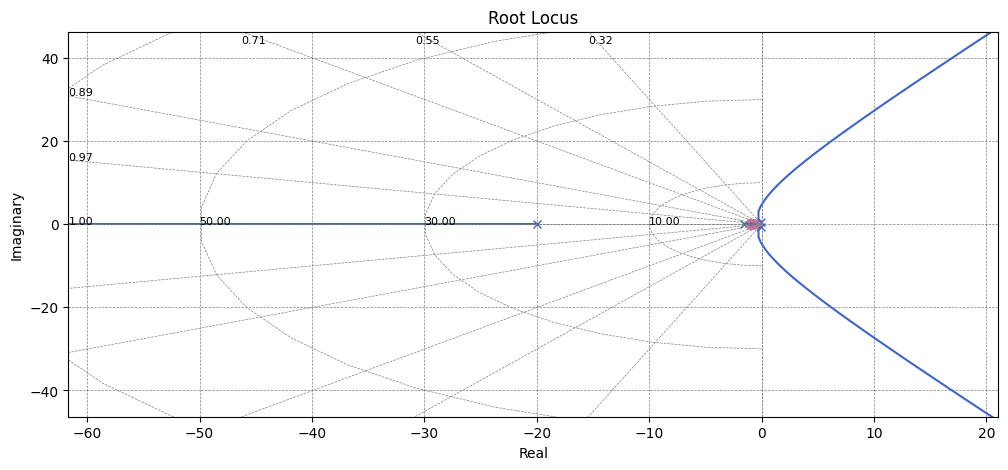

In [6]:
rl = ct.root_locus(sys)
plt.savefig('curves/rl5.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


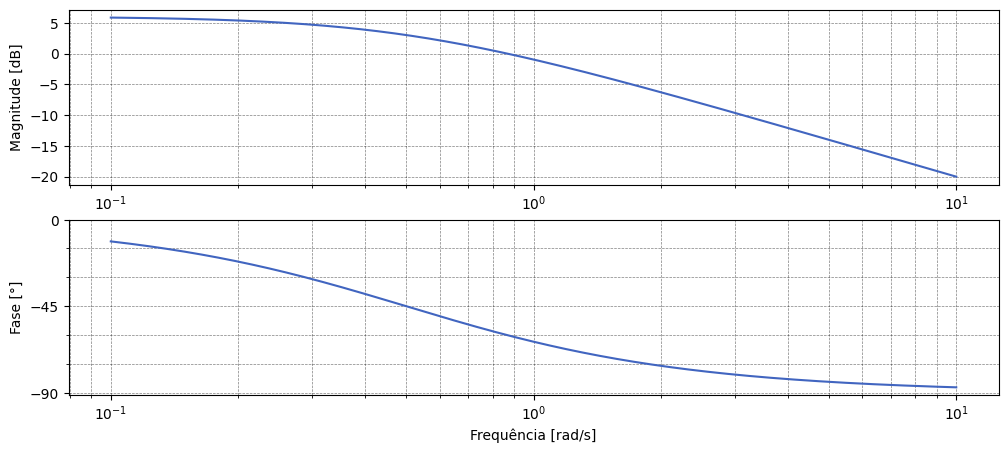

In [7]:
bd = ct.bode(H, dB=True)
plt.xlabel('Frequência [rad/s]')
plt.ylabel('Fase [°]')
plt.subplot(2, 1, 1)
plt.ylabel('Magnitude [dB]')
plt.savefig('curves/bd3.eps', dpi=600, transparent=True, bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


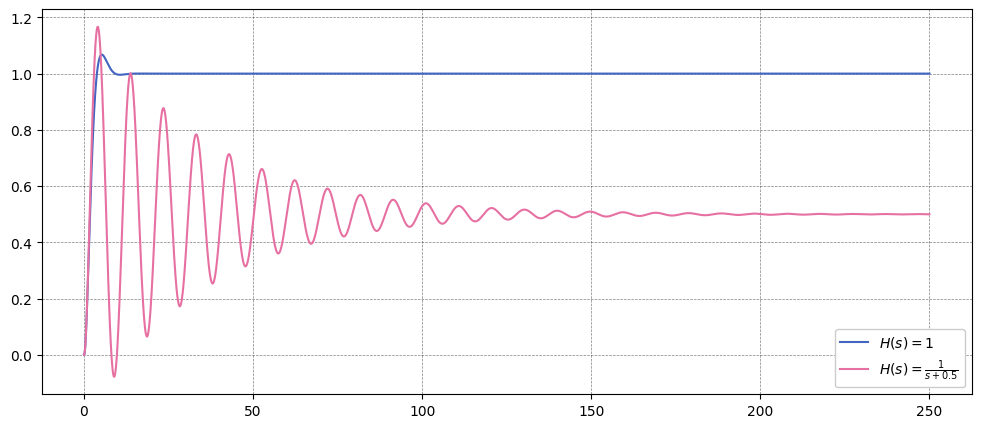

In [8]:
t = np.arange(0, 250, 1e-2)

t, y_ = ct.step_response(sys_, t)
t, y = ct.step_response(sys, t)

plt.figure(1)
plt.plot(t, y_, label='$H(s) = 1$')
plt.plot(t, y, label='$H(s) = \\frac{1}{s+0.5}$')
plt.legend(loc='lower right')
plt.savefig('curves/rt3.eps', dpi=600, transparent=True, bbox_inches='tight')